# Statistical analysis on the first assignment #
## Introduction ##
In this notebook, I will perform statistical analysis on the first assignment of research track 1. 
I carried out a comparison between my algorithm (**1**) and the one proposed by the professor (**2**) regarding the average time to perform a whole lap of the circuit. 
I decided to perform a one tailed paired t-test. I took 30 different samples for each algorithm. This allows performing a t-test, since it requires normal distribution. Indeed for the Central Limit Theorem, if the number of sampling is higher than 30, we can consider the distribution as if it was normal.

The paired t-test is used to compare two population means where we have two samples in which observations in one sample can be paired with observations in the other sample. In this specific case I'm performing a comparison between two different approaches applied to the same scenario to see if the first (**1**) is equal or better than the second (**2**).

## My work ##
### Null and alternative Hypothesis ###

The first thing to do to conduct a statistical analysis is to make a null Hypothesis $H_0$ and an alternative Hypothesis $H_a$: $$H_0:\mu_1 = \mu_2$$ 
$$H_a:\mu_1 < \mu_2$$
Where $\mu_1$ is the mean of the samples of **Algorithm 1** and $\mu_2$ is the mean of **Algorithm 2**.
The alternative hypothesis suppose that algorithm (**1**) is better than algorithm (**2**) since the mean of the time required to complete one lap is lower than the second one.  

The significance level chosen for this analysis was $\alpha = 0.05$.
     
### Sampling and Data visualization ###

After having defined the **null Hypothesis** and the **alternative hypothesis** I ran 30 times each algorithm, by modifying each time the circuit by adding, moving, or deleting the silver tokens in the middle of the path.

Here follow the table with the data acquired:

||s1|s2|s3|s4|s5|s6|s7|s8|s9|s10|s11|s12|s13|s14|s15|s16|s17|s18|s19|s20|s21|s22|s23|s24|s25|s26|s27|s28|s29|s30|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|**1**|1.29|1.30|1.24|1.25|1.27|1.57|1.29|1.23|1.22|1.26|1.26|1.34|1.23|1.21|1.21|1.20|1.21|1.12|1.15|1.09|1.08|1.05|1.30|1.32|1.36|1.40|1.41|1.46|1.48|1.25|
|**2**|2.58|2.55|3.02|3.01|2.57|3.20|3.00|3.09|3.56|2.51|2.58|2.50|4.19|2.49|2.57|2.58|2.46|2.42|2.43|2.31|2.27|2.22|3.14|3.23|3.19|3.28|3.34|3.31|3.40|3.05|

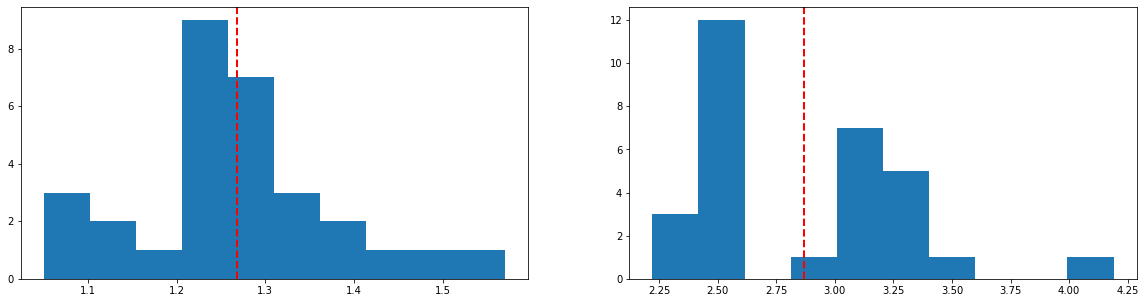

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import statistics

alpha = 0.05
my_algorithm =[1.29, 1.30, 1.24, 1.25, 1.27, 1.57, 1.29, 1.23, 1.22, 1.26, 1.26, 1.34, 1.23, 1.21, 1.21, 1.20, 1.21, 1.12, 1.15, 1.09, 1.08, 1.05, 1.30, 1.32, 1.36, 1.40, 1.41, 1.46, 1.48, 1.25]
professors_algorithm=[2.58, 2.55, 3.02, 3.01, 2.57, 3.20, 3.00, 3.09, 3.56, 2.51, 2.58, 2.50, 4.19, 2.49, 2.57, 2.58, 2.46, 2.42, 2.43, 2.31, 2.27, 2.22, 3.14, 3.23, 3.19, 3.28, 3.34, 3.31, 3.40, 3.05]


plt.figure(figsize=(20,5))
plt1 = plt.subplot(1,2,1)
plt2 = plt.subplot(1,2,2)


plt1.hist(my_algorithm)
plt1.axvline(statistics.mean(my_algorithm), color='r', linestyle='dashed', linewidth=2)


plt2.hist(professors_algorithm)
plt2.axvline(statistics.mean(professors_algorithm), color='r', linestyle='dashed', linewidth=2)
plt.show()

Here on the left it is shown the histogram with the frequency of the values of the samples for **Algorithm 1** while on the right the frequencies of the samples for **Algorithm 2**. In the histograms are shown approximated values of the frequencies.
The two dashed read lines represents the mean of each distribution.

## Performing a one-tailed paired t-test ##

One simple method to perform a paired samples t-test is to use 'ttest_rel' function of the scipy.stats package.


What I obtain as an output from the 'ttest_rel' function is:
* t-vale;
* p-value;

According to the state of the art the p_value is the output for a two-tailed t-test, thus we must divide the p-value by 2 for our one-tailed test, before comparing it with the level of significance $\alpha$. 
 Our null hypothesi should be rejected if $\frac{pvalue}{2}<\alpha$. 
 
 We can also use the t-value to state which algorithm is faster. Indeed t-value depends on the difference of the two means. If it's value is negative, it means that $\mu_1 < \mu_2$, since the algorithm perform the difference $\mu_1 - \mu_2$.
 

In [2]:
# use the following line if the scipy package is missing
#!pip3 install scipy
from IPython.display import HTML, display
from scipy import stats
from scipy.stats import ttest_rel

In [4]:
#Function needed to display the table in which I put the results of the analysis
def display_table(data):
    html = "<table>"
    for row in data:
        html += "<tr>"
        for field in row:
            html += "<td><h4>%s</h4></td>"%(field)
        html += "</tr>"
    html += "</table>"
    display(HTML(html))
#calling ttest_rel function that returns t-value and p-value of the statistics
t_value,p_value=stats.ttest_rel(my_algorithm, professors_algorithm)
#since we are performing a one-tailed t-test we have to change the p-value obtained
one_tailed_p_value=float("{:.6f}".format(p_value/2)) 
data = [['T-value:',t_value],['P-value:', one_tailed_p_value]]
display_table(data)

T-value:,-21.410803953482546
P-value:,0.0


In this statistics we find a t-value of -21.41 with a significance of 0. This means that there is no chance of a t-value less than -21.41 or more than 21.41, if this t-value would be zero in the population (i.e. no difference = equal means) 

## Conclusions ##

As we can see we obtained a p-value which is so close to the zero value that it can be approximated to it. In this case, since $\frac{pvalue}{2} < \alpha$ we reject the null hypothesis $H_0$ stating the equality of the two means. Then, under these assumption we accept the alternative hypothesis $H_a$ which states that the mean of the algorithm $\mu_1$ is less than the mean of the algorithm proposed by the professor $\mu_2$. This means that my algorithm is better in term of lap time than the other one.